# Compare protein structures of consensus sequence with the structure of SNPs modified

In [2]:
import os
import sys

from pathlib import Path

from Bio.PDB import MMCIFParser, Superimposer

# === Input files (AlphaFold CIF files) ===


structuresDirPath = Path(os.environ['GENOMICS_DATA_BASE'], 'annotations', 'e_coli', 'gene_sequences', 'fhub_gene')

cif1_path = Path(structuresDirPath, 'fold_fhub_gene_consensus', 'fold_fhub_gene_consensus_model_0.cif')
cif2_path = Path(structuresDirPath, 'fold_fhub_gene_with_snps', 'fold_fhub_gene_with_snps_model_0.cif')

# === Parse structures ===
parser = MMCIFParser(QUIET=True)
structure1 = parser.get_structure("model1", cif1_path)
structure2 = parser.get_structure("model2", cif2_path)

# Select only C-alpha atoms for comparison
def get_ca_atoms(structure):
    ca_atoms = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if "CA" in residue:
                    ca_atoms.append(residue["CA"])
    return ca_atoms

ca1 = get_ca_atoms(structure1)
ca2 = get_ca_atoms(structure2)

# Ensure equal number of Cα atoms
if len(ca1) != len(ca2):
    sys.exit(f"Different number of Cα atoms: {len(ca1)} vs {len(ca2)}")

# === Superimpose ===
sup = Superimposer()
sup.set_atoms(ca1, ca2)
sup.apply(structure2.get_atoms())

# === Output RMSD ===
print(f"RMSD: {sup.rms:.3f} Å")

RMSD: 0.581 Å


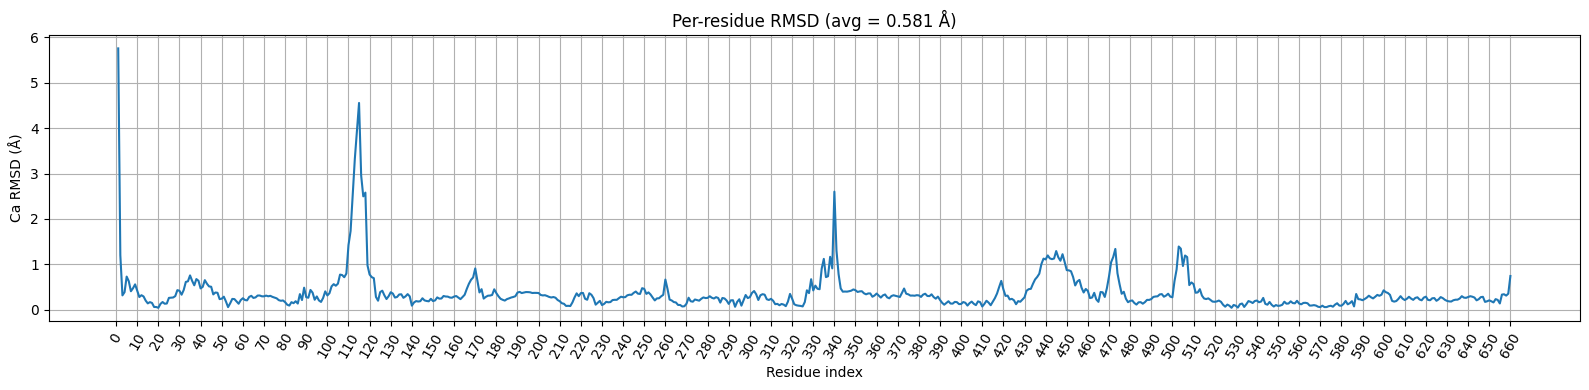

In [3]:
import numpy as np
import matplotlib.pyplot as plt


rmsd_per_residue = [
    np.linalg.norm(ca1[i].coord - ca2[i].coord)
    for i in range(len(ca1))
]

# Plot
plt.figure(figsize=(16, 4))
plt.plot(range(1, len(rmsd_per_residue) + 1), rmsd_per_residue)
plt.xlabel("Residue index")
plt.ylabel("Ca RMSD (Å)")
plt.title(f"Per-residue RMSD (avg = {sup.rms:.3f} Å)")
plt.grid(True)

plt.xticks(
    np.arange(0, len(rmsd_per_residue) + 1, step=10),
    rotation=60
)

plt.tight_layout()
plt.show()